## Kaplan Meier Survival Curve

In [16]:
library(dplyr)
library(survival)
library(survminer)

In [11]:
df1 <- read.csv("./data/df1.csv")
level_age_gp <- c("<55 years", "55-64 years", "65-74 years", ">=75 years")
level_ef_gp <- c("<40%", "40-49%", "50-74%", ">=75%")
level_ef_paper <- c("<=30%", "31-45%", ">45%")
level_sodium_gp <- c("<135mmol/L", "135-145mmol/L", ">145mmol/L")
level_platelets_gp <- c("Thrombocytopenia", "Normal", "Thrombocytosis")
level_platelets_paper <- c("<=Q1", "Q1-Q3", ">=Q3")

df1 <- df1 %>%
  mutate_at(vars(gender, smoking, diabetes, bp, anaemia), factor) %>%
  mutate(
    age_gp = factor(age_gp, levels = level_age_gp, ordered = TRUE),
    ef_gp = factor(ef_gp, levels = level_ef_gp, ordered = TRUE),
    ef_paper = factor(ef_paper, levels = level_ef_paper, ordered = TRUE),
    sodium_gp = factor(sodium_gp, levels = level_sodium_gp, ordered = TRUE),
    platelets_gp = factor(platelets_gp, levels = level_platelets_gp, ordered = TRUE),
    platelets_paper = factor(platelets_paper, levels = level_platelets_paper, ordered = TRUE),
    creatinine_excess = factor(creatinine_excess),
    creatinine_paper = factor(creatinine_paper),
    cpk_excess = factor(cpk_excess)
  )

In [12]:
str(df1)

'data.frame':	296 obs. of  28 variables:
 $ time                        : int  97 180 31 87 113 10 250 27 87 87 ...
 $ event                       : int  0 0 1 0 0 1 0 1 0 0 ...
 $ gender                      : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 2 2 2 ...
 $ smoking                     : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 2 1 1 2 ...
 $ diabetes                    : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 2 1 1 ...
 $ bp                          : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 2 2 1 ...
 $ anaemia                     : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 1 1 1 ...
 $ age                         : num  43 73 70 65 64 75 70 94 75 80 ...
 $ ejection.fraction           : int  50 30 20 25 60 15 40 38 45 25 ...
 $ sodium                      : int  135 142 134 141 137 137 136 134 137 144 ...
 $ creatinine                  : num  1.3 1.18 1.83 1.1 1 1.2 2.7 1.83 1.18 1.1 ...
 $ platelets                   : num  237000 160000 263358 298000 242000 ...
 $ cpk    

### Surivial time
* The survival function was estimated using the Kaplan-Meier method
* Confidence intervals were constructed using the complementary log-log transformation

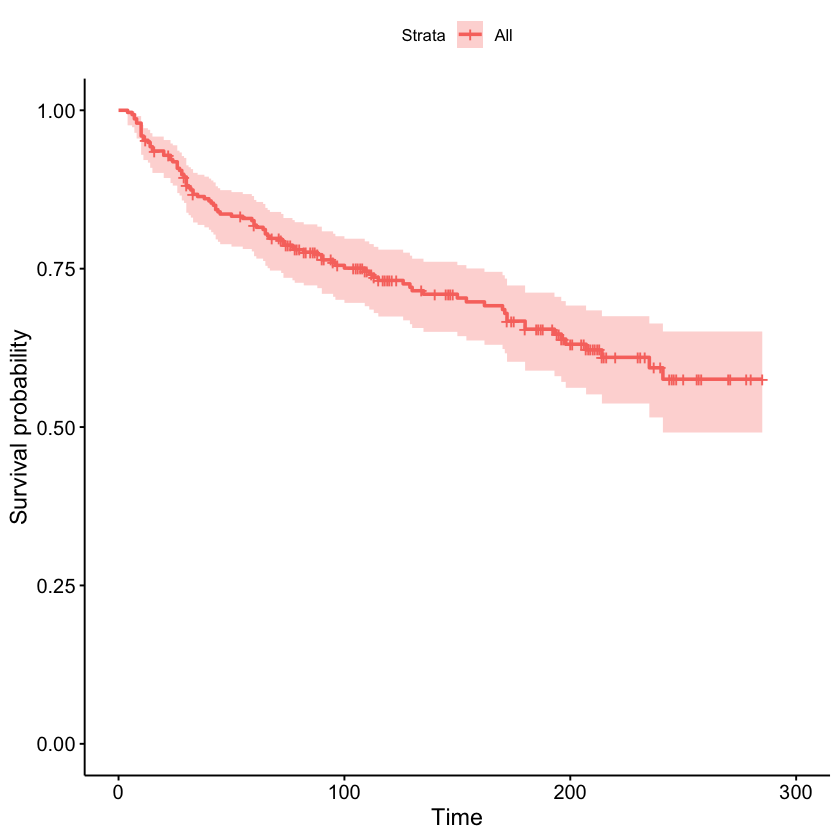

In [17]:
fit <- survfit(Surv(time, event)~1, df1, conf.type = "log-log")
ggsurvplot(fit)

#### By covariates

In [ ]:
variables <- c("gender", "smoking", "diabetes", "bp", "anaemia", "age_gp", "ef_gp", "sodium_gp", "creatinine_excess", "platelets_gp", "cpk_excess")

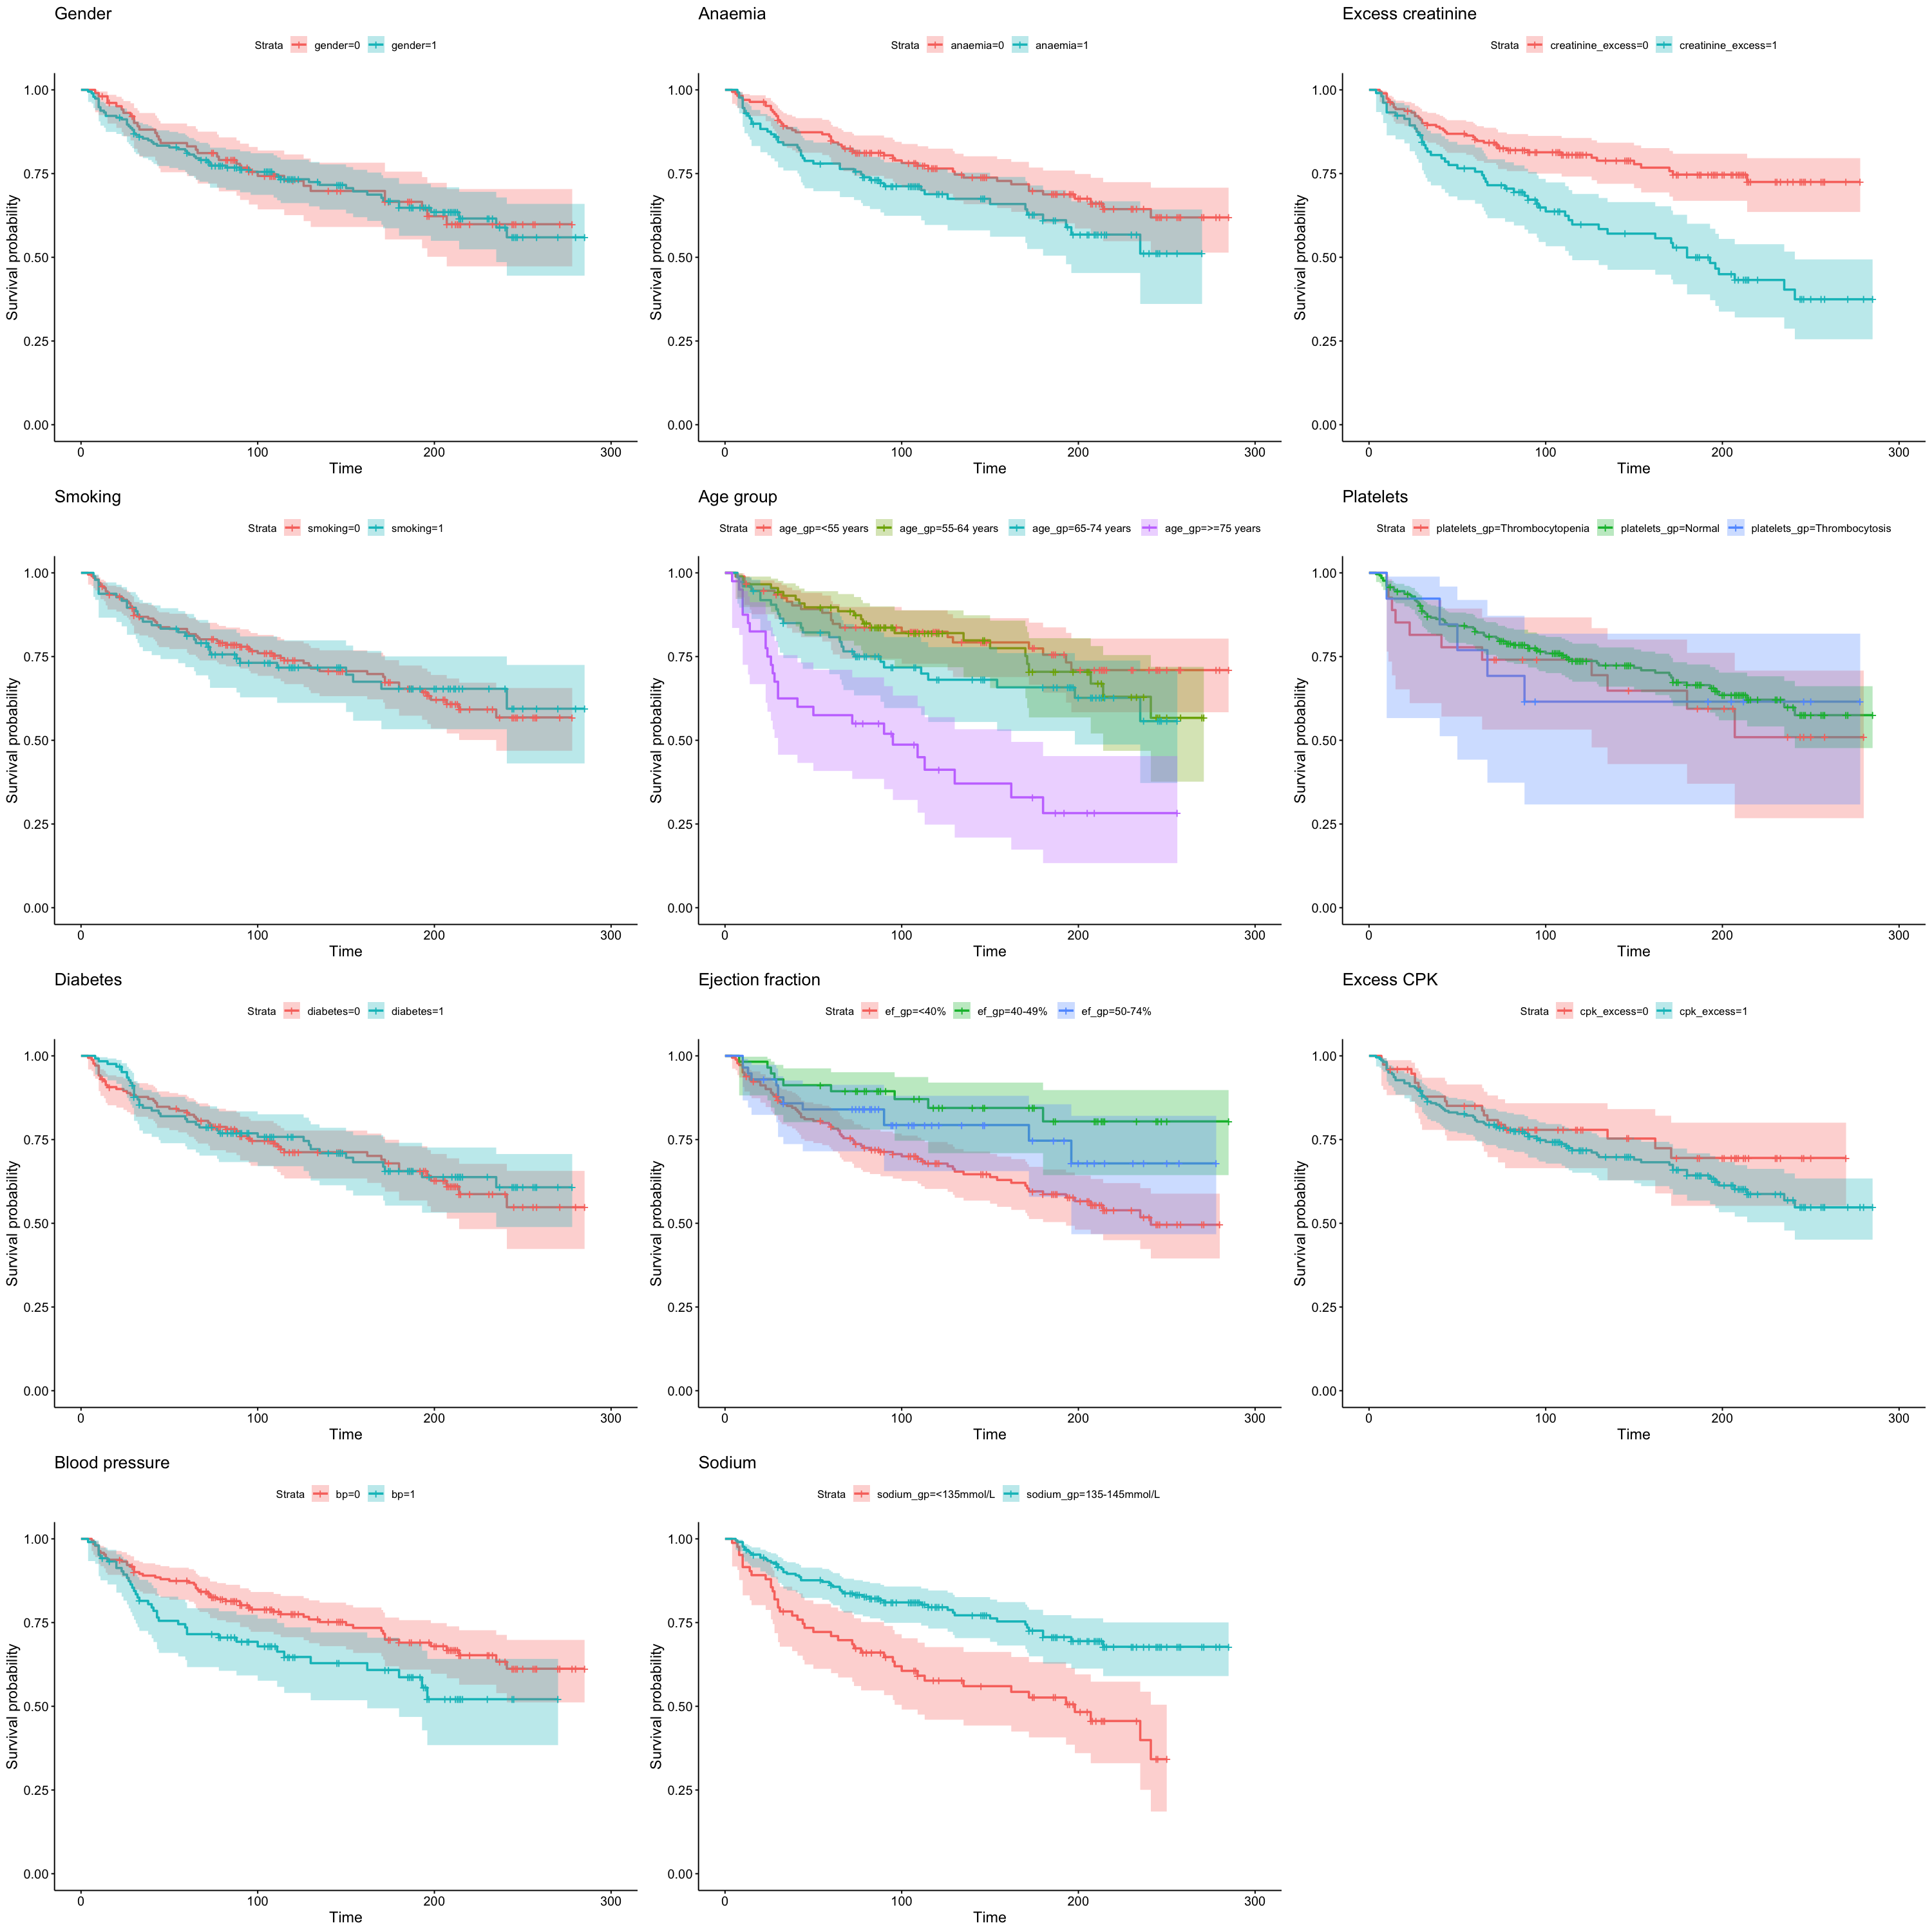

In [20]:
# Save the plots of estimated survival function 
splots <- list()
titles <- c("Gender", "Smoking", "Diabetes", "Blood pressure", "Anaemia", "Age group", "Ejection fraction", "Sodium", "Excess creatinine", "Platelets", "Excess CPK")
for (i in seq_len(length(variables))){
    fit <- survfit(as.formula(paste("Surv(time, event) ~", variables[i])), df1, conf.type = "log-log")
    splots[[variables[i]]] <- ggsurvplot(fit, title=titles[i], conf.int = TRUE)
}
# Show all survival curves
options(repr.plot.width=25, repr.plot.height=25)
arrange_ggsurvplots(splots, print = TRUE, ncol = 3, nrow = 4)
options(repr.plot.width=NULL, repr.plot.height=NULL)

* Gender, Smoking, Diabetes: The survival curves between groups are close. 
* Anaemia, Excess CPK, Blood pressure: The survival curves between groups are separated. Patients with anaemia, excess CPK, or high blood pressure have lower survival probabilities, indicating a higher mortality risk. However, the confidence intervals overlap.
* Excess creatinine, Sodium: The survival curves between groups are clearly separated. Patients with excess creatinine or sodium ≤135 mmol/L have lower survival probabilities. The confidence intervals between groups are also separated.
* Platelets: The survival curves for thrombocytopenia, normal, and thrombocytosis groups are close, with no group appearing drastically worse. The confidence interval of thrombocytopenia and thrombocytosis are wide because of the small smaple size
* Age group: Increasing age correlates with lower survival. Patients aged ≥ 75 years have lowest survival probability. The curves for the remaining age groups are relatively close.
* Ejection fraction: The survival curves for EF ≤40%, 40-49% and 50-74% are separated. The EF 40–49% group has the highest survival probability, whereas the EF ≤40% group shows the worst survival. The confidence intervals of the three curves overlap
* In summary, 
    * Weak or negligible predictors: Gender, Smoking, Diabetes, Platelets, Age group
    * Moderate predictors: Anaemia, Excess CPK, Blood pressure, Ejection fraction
    * Strong predictors of survival: Excess creatinine, Sodium